# Preprocessing

In [ ]:
import pandas as pd

# Baca kedua file CSV
file1 = pd.read_csv('res.csv')
file2 = pd.read_csv('prabowo(3).csv')

# Gabungkan kedua DataFrame
gabungan = pd.concat([file1, file2], ignore_index=True)

# Simpan hasil penggabungan ke file baru
gabungan.to_csv('prabowo_gabungan.csv', index=False)

print("Penggabungan selesai. File disimpan sebagai 'prabowo_gabungan.csv'.")


Penggabungan selesai. File disimpan sebagai 'prabowo_gabungan.csv'.


In [ ]:
pip install transformers torch datasets wordcloud matplotlib seaborn sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

# INDOBERT

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-8-6e4fe1605550>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2', order=df['sentiment'].value_counts().index)


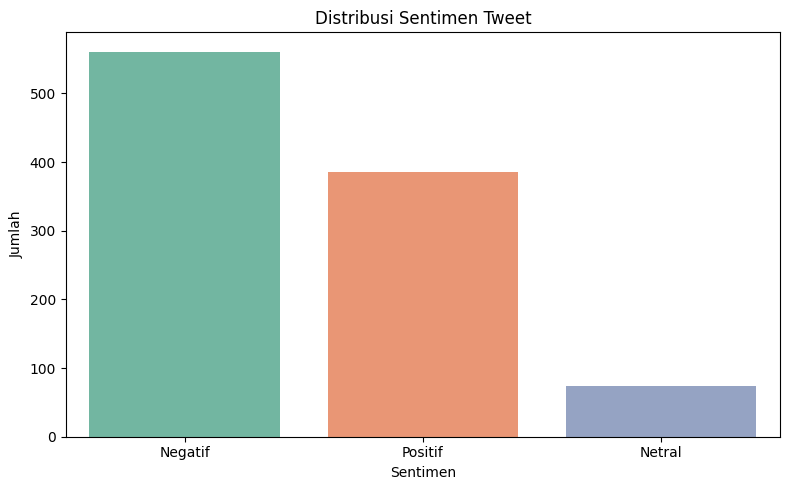

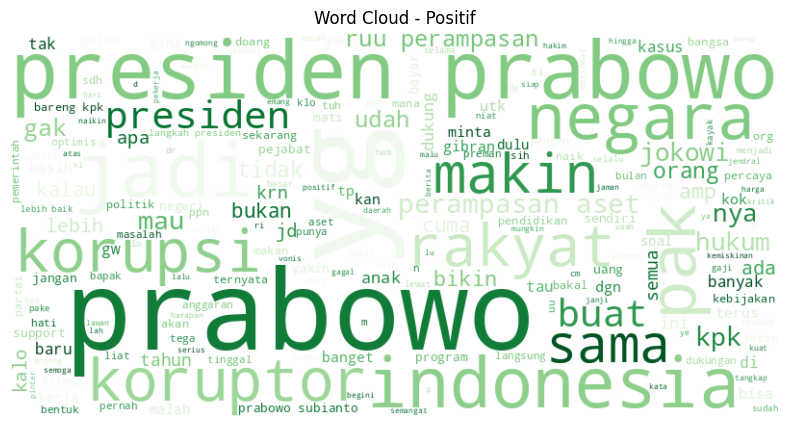

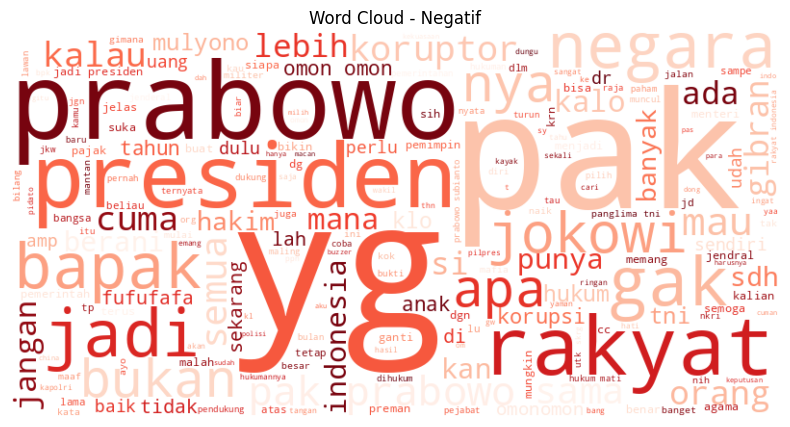

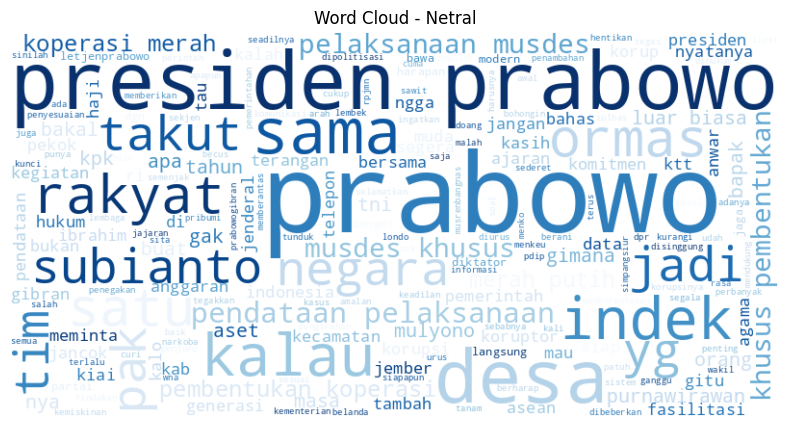

In [ ]:
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Load IndoBERT sentiment model (indoNLU / indobert-base-p1)
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1", num_labels=3)

# Mapping label ke sentimen
id2label = {0: "Negatif", 1: "Netral", 2: "Positif"}

# Stopwords
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Kamus slang/singkatan
slang_dict = {
    'anjg': 'anjing',
    'bgt': 'banget',
    'gk': 'tidak',
    'ga': 'tidak',
    'tdk': 'tidak',
    'bgt': 'banget',
    'pdhl': 'padahal',
    'cmn': 'cuma',
    'knp': 'kenapa',
    'jg': 'juga',
    'aja': 'saja',
    'sm': 'sama'
}

# Fungsi normalisasi slang
def normalize_slang(text):
    for slang, formal in slang_dict.items():
        text = re.sub(rf'\b{slang}\b', formal, text)
    return text

# Bersihkan teks
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|@\w+|#\w+|[^a-zA-Z\s]", "", text)
    text = normalize_slang(text)
    text = stopword_remover.remove(text)
    return text.strip()

# Fungsi prediksi sentimen
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        predicted = torch.argmax(outputs.logits, dim=1).item()
    return id2label[predicted]

# Load data
df = pd.read_csv('/content/prabowo_gabungan.csv')
df['clean_text'] = df['full_text'].astype(str).apply(clean_text)
df['sentiment'] = df['clean_text'].apply(predict_sentiment)

# Simpan hasil
df.to_csv('hasil_sentimen_indobert.csv', index=False)

# Plot distribusi sentimen
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='Set2', order=df['sentiment'].value_counts().index)
plt.title('Distribusi Sentimen Tweet')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# Wordcloud per sentimen
def show_wordcloud(data, sentiment, color):
    text = ' '.join(data[data['sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {sentiment}')
    plt.show()

# Buat WordCloud
show_wordcloud(df, 'Positif', 'Greens')
show_wordcloud(df, 'Negatif', 'Reds')
show_wordcloud(df, 'Netral', 'Blues')

# TEXTBLOB - Kurang Akurat

In [ ]:
# pip install pandas matplotlib seaborn sastrawi textblob wordcloud nltk

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud
# from textblob import TextBlob
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# import re
# import string
# import nltk
# nltk.download('punkt')

# # Inisialisasi Stopword Remover
# stopword_factory = StopWordRemoverFactory()
# stopword_remover = stopword_factory.create_stop_word_remover()

# # Fungsi: Membersihkan teks
# def clean_text(text):
#     text = str(text).lower()  # huruf kecil
#     text = re.sub(r"http\S+", "", text)  # hapus URL
#     text = re.sub(r"@\w+", "", text)  # hapus mention
#     text = re.sub(r"#\w+", "", text)  # hapus hashtag
#     text = re.sub(r"[^\w\s]", "", text)  # hapus tanda baca
#     text = re.sub(r"\d+", "", text)  # hapus angka
#     text = text.strip()
#     return text

# # Fungsi: Hapus stopword
# def remove_stopwords(text):
#     return stopword_remover.remove(text)

# # Fungsi: Sentiment analysis menggunakan TextBlob
# def get_sentiment(text):
#     blob = TextBlob(text)
#     polarity = blob.sentiment.polarity
#     if polarity > 0.1:
#         return "Positif"
#     elif polarity < -0.1:
#         return "Negatif"
#     else:
#         return "Netral"

# # Load data
# df = pd.read_csv('/content/prabowo_gabungan.csv')

# # Proses cleaning
# df['clean_text'] = df['full_text'].astype(str).apply(clean_text).apply(remove_stopwords)

# # Sentiment Analysis
# df['sentiment'] = df['clean_text'].apply(get_sentiment)

# # Simpan hasil
# df.to_csv('hasil_sentimen_lengkap.csv', index=False)

# # Plot distribusi sentimen
# plt.figure(figsize=(8, 5))
# sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='Set2')
# plt.title('Distribusi Sentimen Tweet')
# plt.xlabel('Sentimen')
# plt.ylabel('Jumlah Tweet')
# plt.tight_layout()
# plt.show()

In [ ]:
# # WordCloud untuk masing-masing sentimen
# def generate_wordcloud(data, label, color):
#     text = ' '.join(data[data['sentiment'] == label]['clean_text'])
#     wc = WordCloud(width=800, height=400, background_color='white', colormap=color, max_words=100).generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wc, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(f'Word Cloud - Sentimen {label}')
#     plt.show()

In [ ]:
# # WordCloud per sentimen
# generate_wordcloud(df, 'Positif', 'Greens')
# generate_wordcloud(df, 'Negatif', 'Reds')
# generate_wordcloud(df, 'Netral', 'Blues')